# This notebook will serve for the initial EDA for the ratings data for the TFW project

In [2]:
# Import necassary libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

ROOT = os.environ.get('PWD')

In [4]:
# read in the dataset

df_rating = pd.read_csv('../data/rating_20210713.csv')

In [7]:
# convert rating_date, date_from and data_to to datetime 

df_rating['rating_date'] = pd.to_datetime(df_rating['rating_date'])
df_rating['date_from'] = pd.to_datetime(df_rating['date_from'], errors = 'coerce')
df_rating['date_to'] = pd.to_datetime(df_rating['date_to'], errors = 'coerce')

In [10]:
print (df_rating.dtypes)

rating_date    datetime64[ns]
listing_id             object
features                int64
price                   int64
service                 int64
ambience                int64
date_from      datetime64[ns]
date_to        datetime64[ns]
dtype: object


# test to see how long stays tend to be in our ratings data

In [11]:
df_rating['length_of_stay'] = (df_rating.date_to - df_rating.date_from).dt.days


In [13]:
df_stay = df_rating['length_of_stay'].mean()
df_stay

7.534252304305957

In [16]:
df_rating['month_year'] = df_rating['rating_date'].dt.to_period('M')

In [17]:
df_rating['month_year']

0         2012-09
1         2012-10
2         2014-06
3         2014-10
4         2015-08
           ...   
183908    2020-08
183909    2020-08
183910    2020-07
183911    2018-08
183912    2021-07
Name: month_year, Length: 183913, dtype: period[M]

In [60]:
y = df_rating.groupby(df_rating['month_year']).count().reset_index()

In [61]:
type(y)

pandas.core.frame.DataFrame

In [62]:
y

,month_year,rating_date,listing_id,features,price,service,ambience,date_from,date_to,length_of_stay
0,2005-09,1,1,1,1,1,1,0,0,0
1,2005-11,5,5,5,5,5,5,0,0,0
2,2005-12,4,4,4,4,4,4,0,0,0
3,2006-01,7,7,7,7,7,7,0,0,0
4,2006-02,5,5,5,5,5,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...
185,2021-03,81,81,81,81,81,81,81,81,81
186,2021-04,68,68,68,68,68,68,68,68,68
187,2021-05,711,711,711,711,711,711,711,711,711
188,2021-06,2543,2543,2543,2543,2543,2543,2543,2543,2543


TypeError: float() argument must be a string or a number, not 'Period'

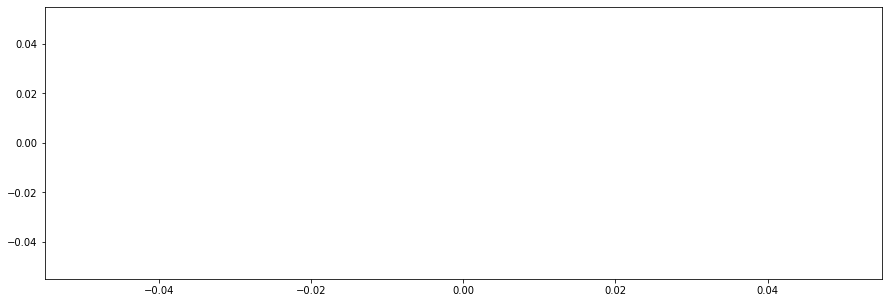

In [59]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=y, x=df_rating['month_year'], y='listing_id')

In [ ]:
sns.displot(df_rating['length_of_stay'])